A Notebook to draw annotations

In [1]:
############# Specify #############
labelme_root = 'C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\datasets\\with_global_salmon_IDs\\CS_val\\'
validation_output_root = 'C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\datasets\\with_global_salmon_IDs\\CS_val\\val_plots'

frame_num = 14150

In [2]:
import os
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('\\'.join(os.getcwd().split('\\')[:-1]) + '\\helpers\\')
sys.path.append('\\'.join(os.getcwd().split('\\')[:-1]) + '\\detector\\')
import keybox_utils as ku
from draw_utils import annotate_frame
from file_utils import load_labelme_data_for_eval


In [3]:
config = {  'components': ['salmon', 'head', 'dorsal_fin', 'adi_fin', 'tail_fin', 'anal_fin','pelv_fin','pec_fin', 'body'], 
            'additional_kps': [],
            'skeleton': [['head', 'dorsal_fin'], ['head', 'body'], ['head', 'pec_fin'], ['body', 'dorsal_fin'], ['dorsal_fin', 'adi_fin'], ['adi_fin', 'anal_fin'], ['adi_fin', 'tail_fin'], ['tail_fin', 'body'], ['tail_fin', 'anal_fin'], ['anal_fin', 'pelv_fin'], ['pelv_fin', 'body'], ['pelv_fin', 'pec_fin']],
            'component_colors': {'salmon': (200,100,50),'body': (0,255,0),'head': (255,0,0),'tail_fin': (255,0,255),'dorsal_fin': (0,0,255),'anal_fin': (0,255,255),'adi_fin': (255,255,0),'pelv_fin': (120,120,120),'pec_fin': (50, 100, 200)},
            'salmon_bbox_thickness': 8,
            'bp_bbox_thickness': 4, 
            'video_shape': (4242, 4242)}
labled_dets = load_labelme_data_for_eval(labelme_root, config, frame_offset=0, splitter='_f')
targets = np.array([[int(v) for v in ku.xywh2xyxy(t[2:6].astype(float))] + [int(t[1])] + [1] + [config['components'].index(str(t[10]))] for t in labled_dets if t[0] == str(frame_num)])

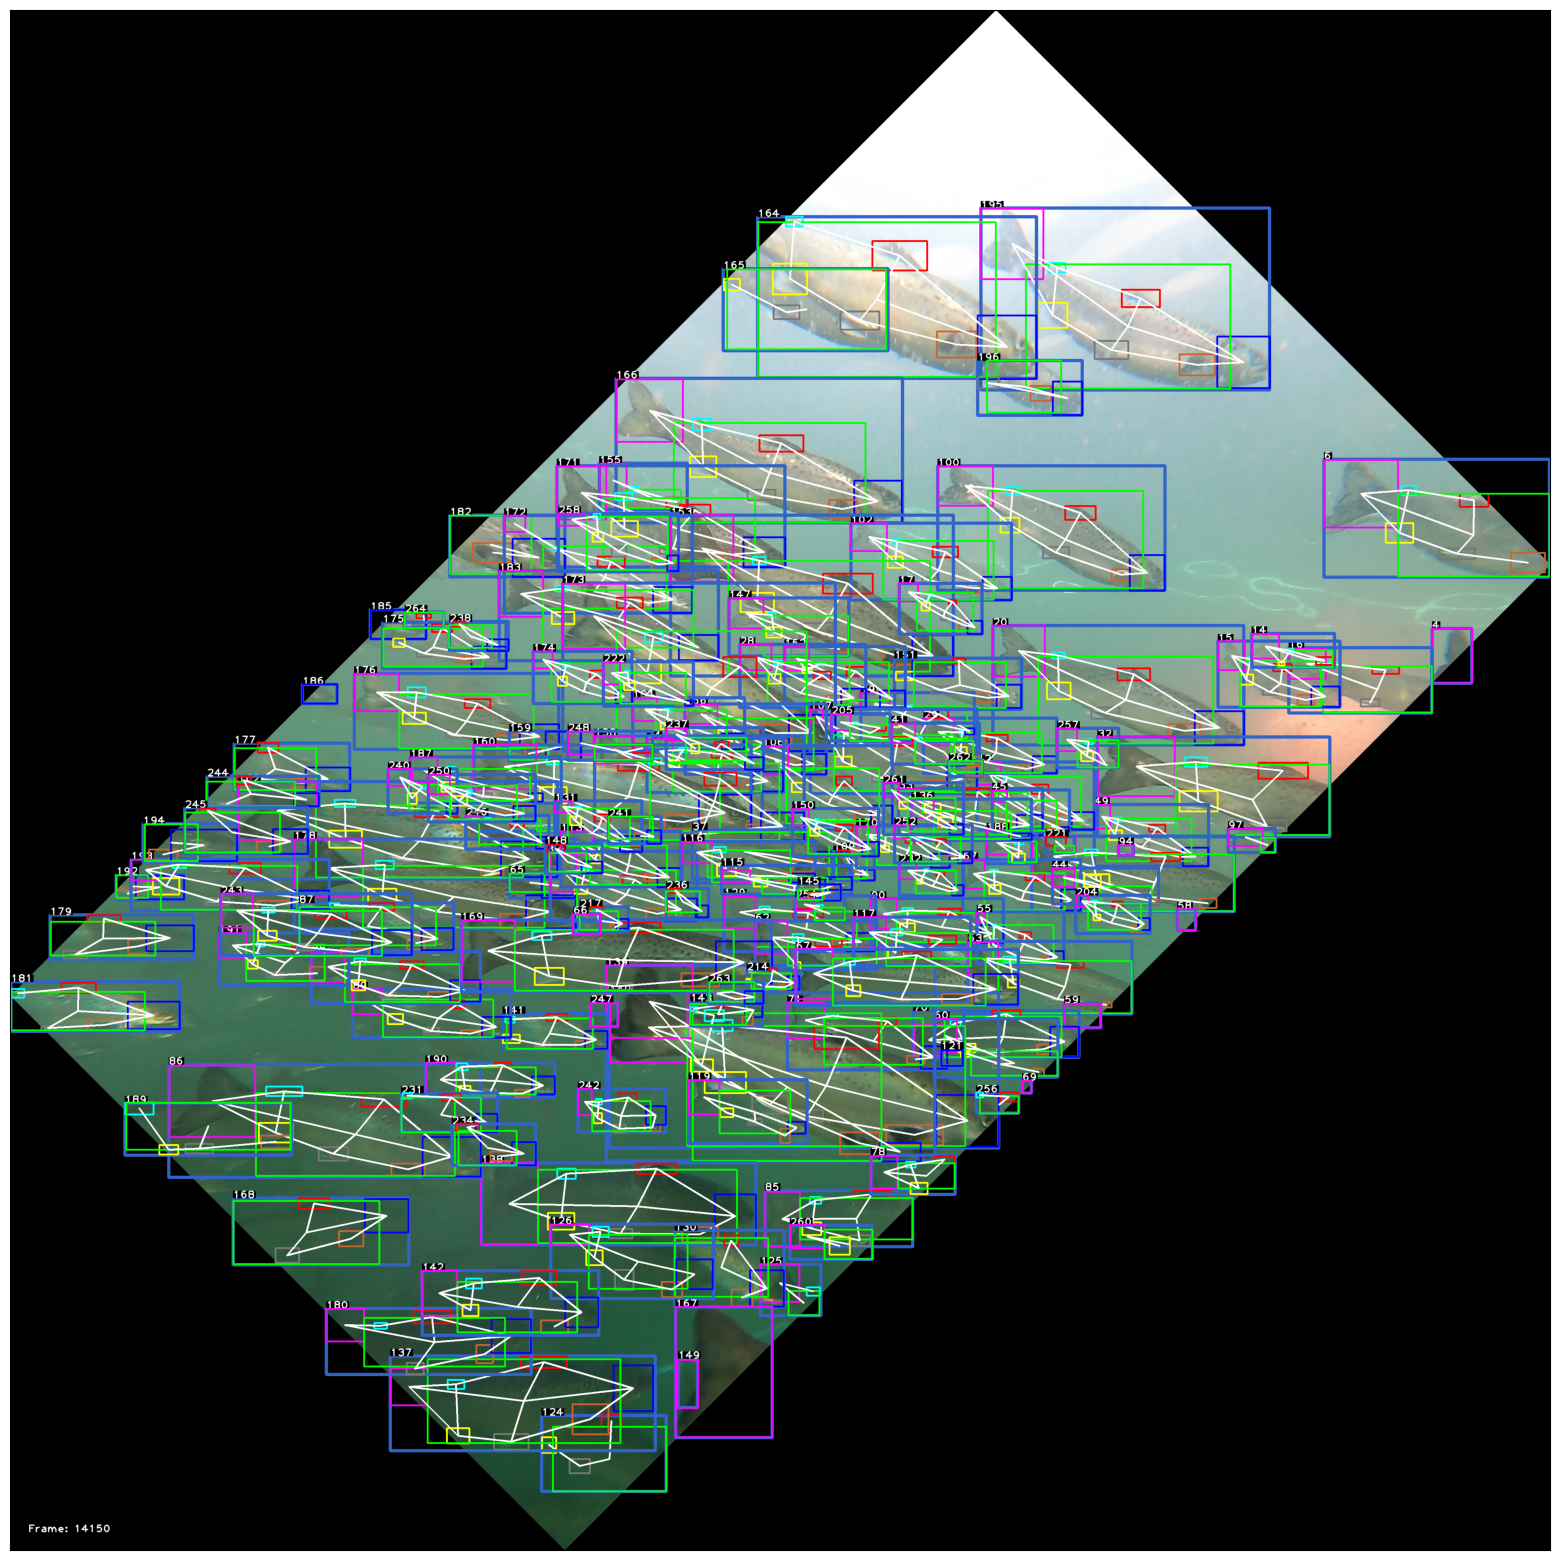

In [4]:
image_paths = os.listdir(labelme_root + '\\images\\')
image_path = [i for i in image_paths if i.endswith('_f' + str(frame_num) + '.png')][0]
frame = cv2.imread(labelme_root + '\\images\\' + image_path)

annot_frame = annotate_frame(targets, frame, frame_num, config, True, font_scale=2, skeleton_line_thickness = 4, font_thickness=2)
annot_frame = cv2.cvtColor(annot_frame, cv2.COLOR_RGB2BGR)

fig, ax = plt.subplots(1,1,figsize = (20,20))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(annot_frame)
fig.savefig(validation_output_root + '\\' + image_path.split('.')[0] + '_val_plot.png') 